In [14]:
import os
#os.chdir("F:\\TA\\Labs\\NLP\\Batch 23\\Day 5\\20170129_Batch23_CSE7306c_Day05_Lab_Network")
# Graph Basics
# We use the module NetworkX for graph manipulaiton and matplotlib for plotting (both are already available in Anaconda) 

import matplotlib.pyplot as plt
# for Populating the interactive namespace from numpy and matplotlib
# get_ipython().magic('matplotlib inline')
%matplotlib inline

# %pylab inline  # ipython line 

In [15]:
#from IPython import get_ipython
#get_ipython().run_line_magic('matplotlib', 'inline')

# Example of plot
#plt.figure(figsize=(1,1))
#x = [1,2,3]
#plt.plot(x, x)

plt.rcParams['figure.figsize'] = (5, 3) #for creating plot-size width 5 inches and height 3 inches

import networkx as nx

# Populating the interactive namespace from numpy and matplotlib
plt.rcParams['figure.figsize']

[5.0, 3.0]

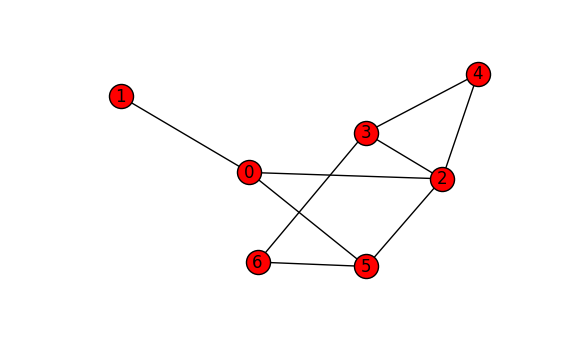

In [16]:
# Creating a simple graph from edges¶

G = nx.Graph()
edge_data = [(0,1), (0,2), (2,3), (3,4), (4,2), (2,5), (5,0), (6,3), (5,6)]
G.add_edges_from(edge_data) #This is an undirected graph
nx.draw(G,with_labels = True)

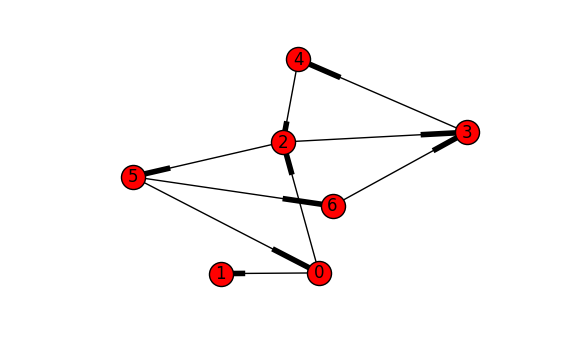

In [17]:
#For a directed graph we use digraph
G_ = nx.DiGraph()
G_.add_edges_from(edge_data)
nx.draw(G_,with_labels = True)

In [18]:
# Using the lists below, we give our attribute information¶

names = ["Alice", "Bob", "Claire", "Dennis", "Esther", "Frank", "George"]
age = [25, 31, 18, 47, 22, 23, 15]
gender = ["f", "m", "f", "m", "f", "m", "m"]
is_follower = [1, 0, 1, 1, 1, 0, 1, 0, 1]

print(G.edges())
print(G.nodes())

[(0, 1), (0, 2), (0, 5), (2, 3), (2, 4), (2, 5), (3, 4), (3, 6), (5, 6)]
[0, 1, 2, 3, 4, 5, 6]


Name: 
Type: Graph
Number of nodes: 7
Number of edges: 9
Average degree:   2.5714


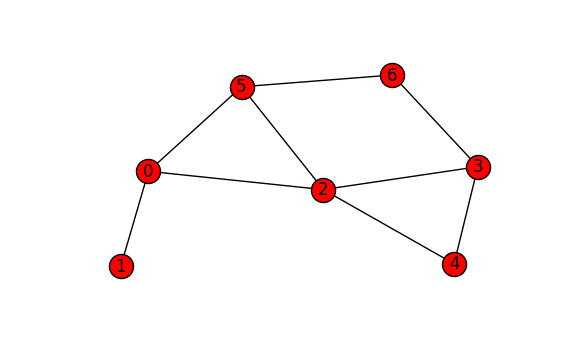

In [20]:
for i in range(len(G.nodes())):
    G.node[i]['names'] = names[i]
    G.node[i]['age'] = age[i]
    G.node[i]['gender'] = gender[i]
nx.set_edge_attributes(G, 'is_follower', is_follower)

nx.draw(G,with_labels = True)
print(nx.info(G))


In [7]:
G.node[0]
for i in range(len(G.nodes())):
    print(G.node[i])

{'gender': 'f', 'age': 25, 'names': 'Alice'}
{'gender': 'm', 'age': 31, 'names': 'Bob'}
{'gender': 'f', 'age': 18, 'names': 'Claire'}
{'gender': 'm', 'age': 47, 'names': 'Dennis'}
{'gender': 'f', 'age': 22, 'names': 'Esther'}
{'gender': 'm', 'age': 23, 'names': 'Frank'}
{'gender': 'm', 'age': 15, 'names': 'George'}


In [23]:
# Various graph attributes are mentioned below
# betweeennes_centrality of an edge is the sum of the fraction of all-pairs shortest paths that passes through
print(nx.edge_betweenness_centrality(G, normalized=False))
print(nx.degree(G))  # sum(degree or number of connections of each node)/number of nodes = 2*number of edges/number of nodes

{(5, 6): 4.0, (0, 5): 4.0, (0, 2): 6.0, (2, 3): 4.0, (3, 6): 3.0, (0, 1): 6.0, (2, 5): 3.0, (3, 4): 2.0, (2, 4): 4.0}
{0: 3, 1: 1, 2: 4, 3: 3, 4: 2, 5: 3, 6: 2}


3
{0: 0.3333333333333333, 1: 0.0, 2: 0.3333333333333333, 3: 0.3333333333333333, 4: 1.0, 5: 0.3333333333333333, 6: 0.0}


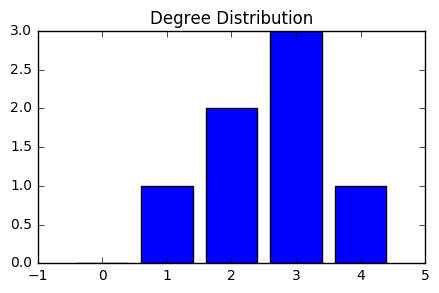

In [9]:
# FOR IN AND OUT DEGREES WE USE -> G_.out_degree()
print(nx.diameter(G))  # maximum of (# hops) shortest path of any pair of nodes in the graph
print(nx.clustering(G)) # clustering coefficient =  actual edges between neighbours / number of possible connection between neighbours 
plt.bar(range(5), nx.degree_histogram(G), align = 'center'); plt.title('Degree Distribution'); plt.show()

layout = nx.spring_layout(G)

['Alice', 'Claire', 'Esther']


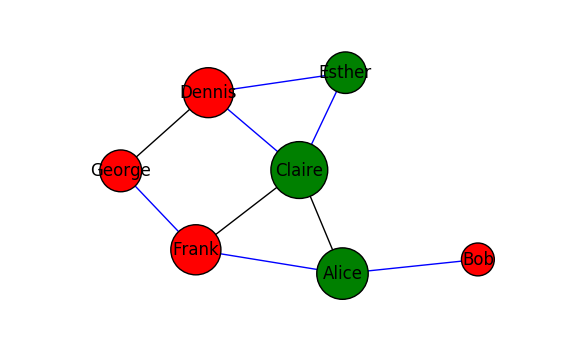

In [28]:
#DO THE FOLLOWING
#GET THE SHORTEST PATH BETWEEN ALICE (Node 0) AND ESTHER (Node 4)
#PLOT THE GRAPH BASED ON PAGE RANK SCORE OF THE GRAPH
#GET THE HITS SCORES
print([names[i] for i in nx.shortest_path(G,source=0,target=4)])
ranks = nx.pagerank(G).values()
nx.draw(G, node_size = [x*8000 for x in ranks], 
        labels = nx.get_node_attributes(G, 'names'),
        node_color = [['red', 'green'][i=='f'] for i in gender],
        edge_color = [['black', 'blue'][i] for i in is_follower], 
        pos = layout)

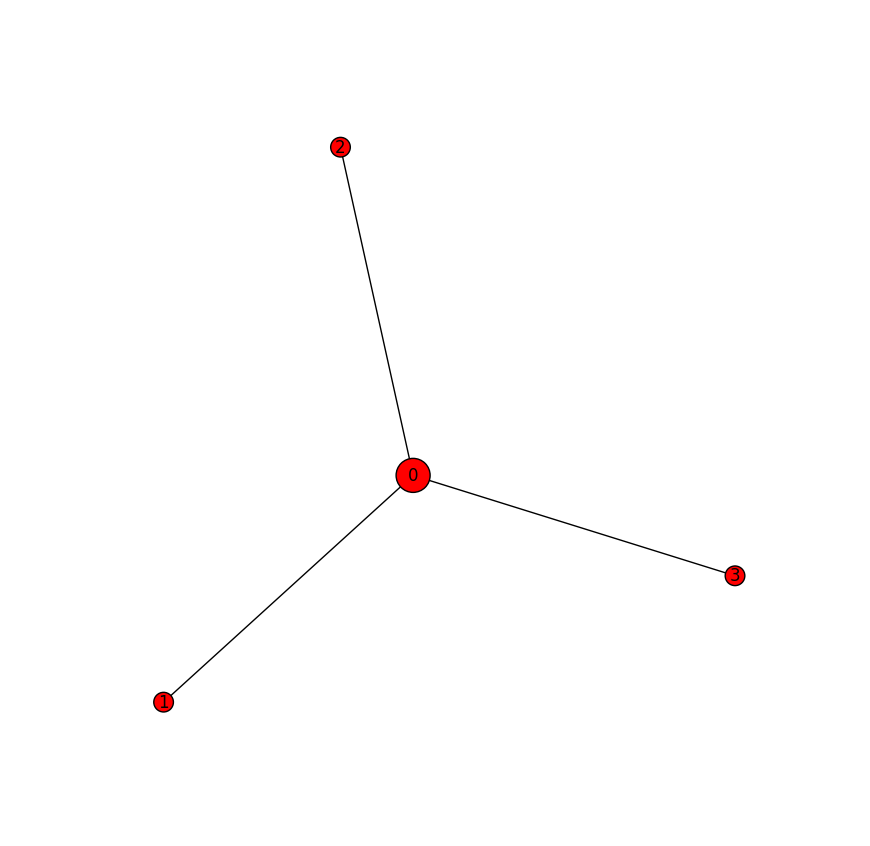

In [31]:
#CREATE A BALANCED TREE of ~50 NODES AND PLOT A GRAPH WITH VERTEX SIZE BASED ON Edge Betweenness Centrality
X = nx.balanced_tree(3,1) # Branching factor is 2 & height is 5
# layout = nx.spring_layout(X)

plt.rcParams['figure.figsize'] = (8, 8)
size = [200*i for i in nx.degree(X).values()]  # node size for visibility
nx.draw(X, node_size=size, with_labels= True)#, layout = layout)

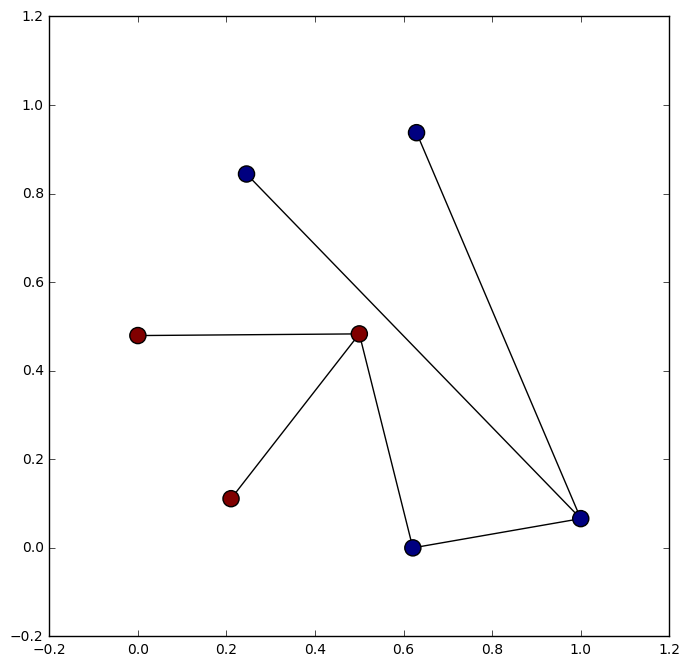

In [12]:
# Community Detection¶

# pip install community
# pip install python-louvain

#go to the location of the zip python-louvain-0.5.tar.gz and extract the files and...
#... open terminal and >python setup.py install
import community 
parts = community.best_partition(X)
values = [parts.get(node) for node in X.nodes()]
nx.draw_networkx(X, pos = layout, node_color = values, node_size = 135, with_labels = False)

Name: 
Type: Graph
Number of nodes: 4039
Number of edges: 88234
Average degree:  43.6910


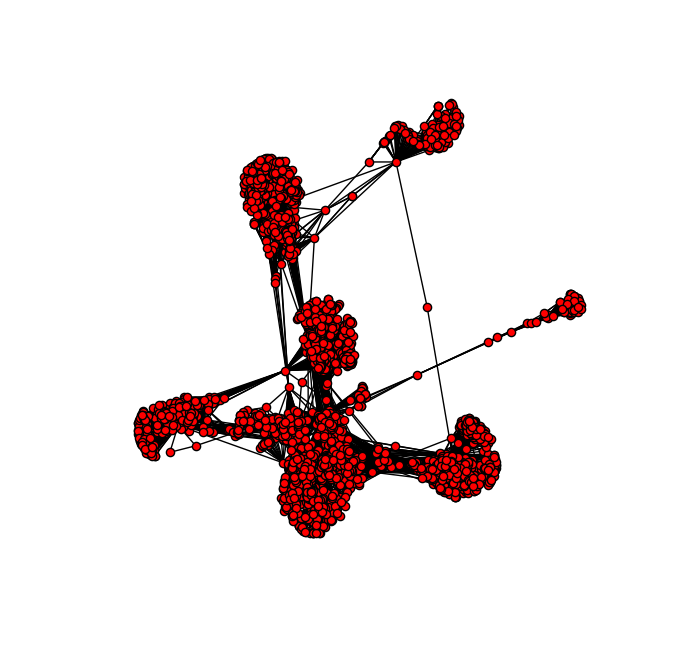

In [32]:
# Import the Graph facebook_combined.txt and plot the communities¶
#import Graph facebook_combined.txt
G_fb = nx.read_edgelist("facebook_combined.txt", create_using = nx.Graph(), nodetype = int)
print(nx.info(G_fb))

spring_pos = nx.spring_layout(G_fb)
plt.axis("off")

nx.draw_networkx(G_fb, pos = spring_pos, with_labels = False, node_size = 35)

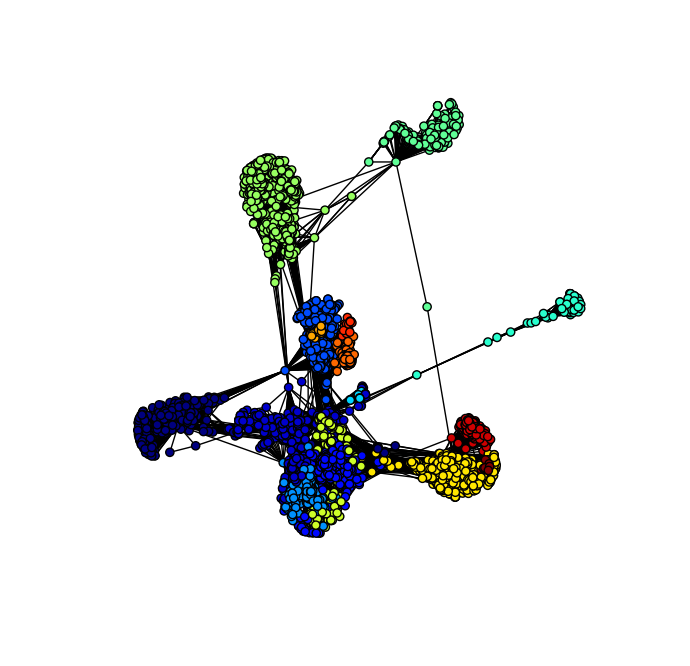

In [33]:
import community
parts = community.best_partition(G_fb)
values = [parts.get(node) for node in G_fb.nodes()]

plt.axis("off")
nx.draw_networkx(G_fb, pos = spring_pos, cmap = plt.get_cmap("jet"), node_color = values, node_size = 35, with_labels = False)

In [9]:
############################ Links for reference###########################################

#http://www.bu.edu/networks/files/2012/08/networkx_tutorial.pdf

#https://networkx.github.io/documentation/networkx-1.10/_downloads/networkx_tutorial.pdf
# https://networkx.github.io/documentation/development/tutorial/tutorial.html